<a href="https://colab.research.google.com/github/YashJain0224/Car-Price-Prediction/blob/main/CarPricePredictionTillStep3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello, World!")

Hello, World!


In [ ]:
# Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install('seaborn')
import seaborn as sns

In [ ]:
# Importing Data

In [ ]:
cars = pd.read_csv("Car.csv")
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# Understanding the structure of the data

In [ ]:
cars.shape

(205, 26)

In [ ]:
# gives us the description of each column, min, max value, count, mean and standard deviation
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
# To get find out how many null values are there in the data, if there are we need to clean them
# Fortunately we didn't have them, still this is how we would have cleaned the data if we had to
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
# DATA CLEANING AND PREPARATION

In [ ]:
# Extracting company name from car name and creating a new column named CompanyName
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(2, 'CompanyName', CompanyName)
cars.head()

,car_ID,symboling,CompanyName,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,alfa-romero giulia,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,alfa-romero stelvio,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,audi 100 ls,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,audi 100ls,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# We don't require car name for creating the model so dropping that
cars.drop(['CarName'], axis=1, inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
# As you can see there seems to be speeling errors in the data, which might generate unwanted results
# mazda & maxda
# Nissan & nissan
# porsche & porcshce
# volkswagen & vokswagen & vw
# toyota & toyouta
# So we're gonna remove this spelling errors

In [ ]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a, b):
    cars.CompanyName.replace(a, b, inplace=True)

replace_name('maxda', 'mazda')
replace_name('porcshce', 'porsche')
replace_name('toyouta', 'toyota')
replace_name('vokswagen', 'volkswagen')
replace_name('vw', 'volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
# Checking for duplicate rows.
# .duplicated() returns an array of boolean values indicating which rows are ducplicates and which are not. True - duplicate, False - not a duplicate
# As you can see there are no rows shown below therefore, there are no duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
cars.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
# DATA VISUALIZATION

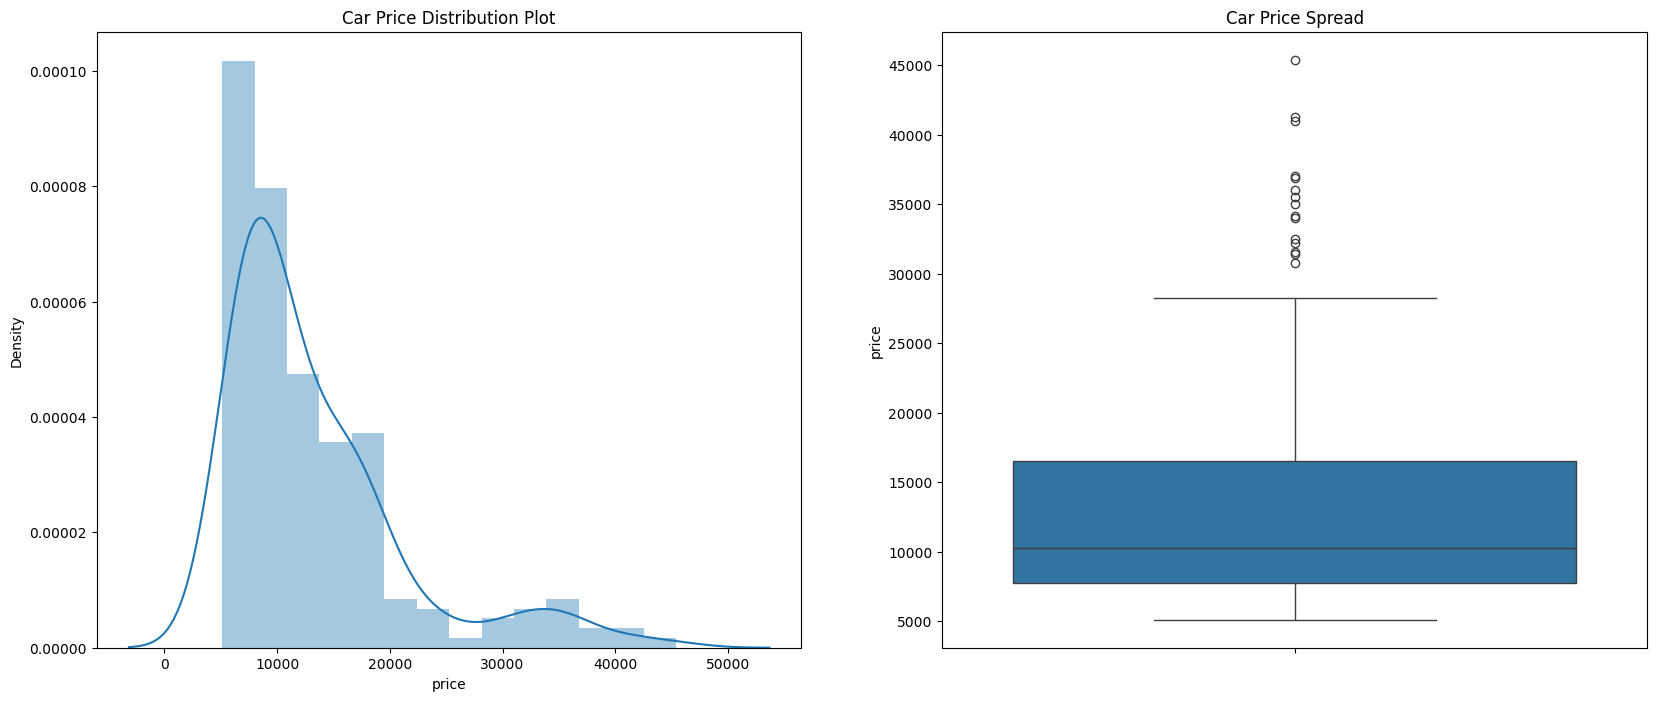

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [ ]:
# Get the description of the price column, to get min, max, count and mean price of cars
cars.price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [ ]:
# Inferences
# --> Most prices in the dataset are low (below $15,000)
# --> Significant difference between mean($13,276) and median($10,295)
# --> 85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400. Therefore variance(spread between numbers in a dataset) is high

In [ ]:
# Visualising categorical data
# Visualising according to each features(columns)

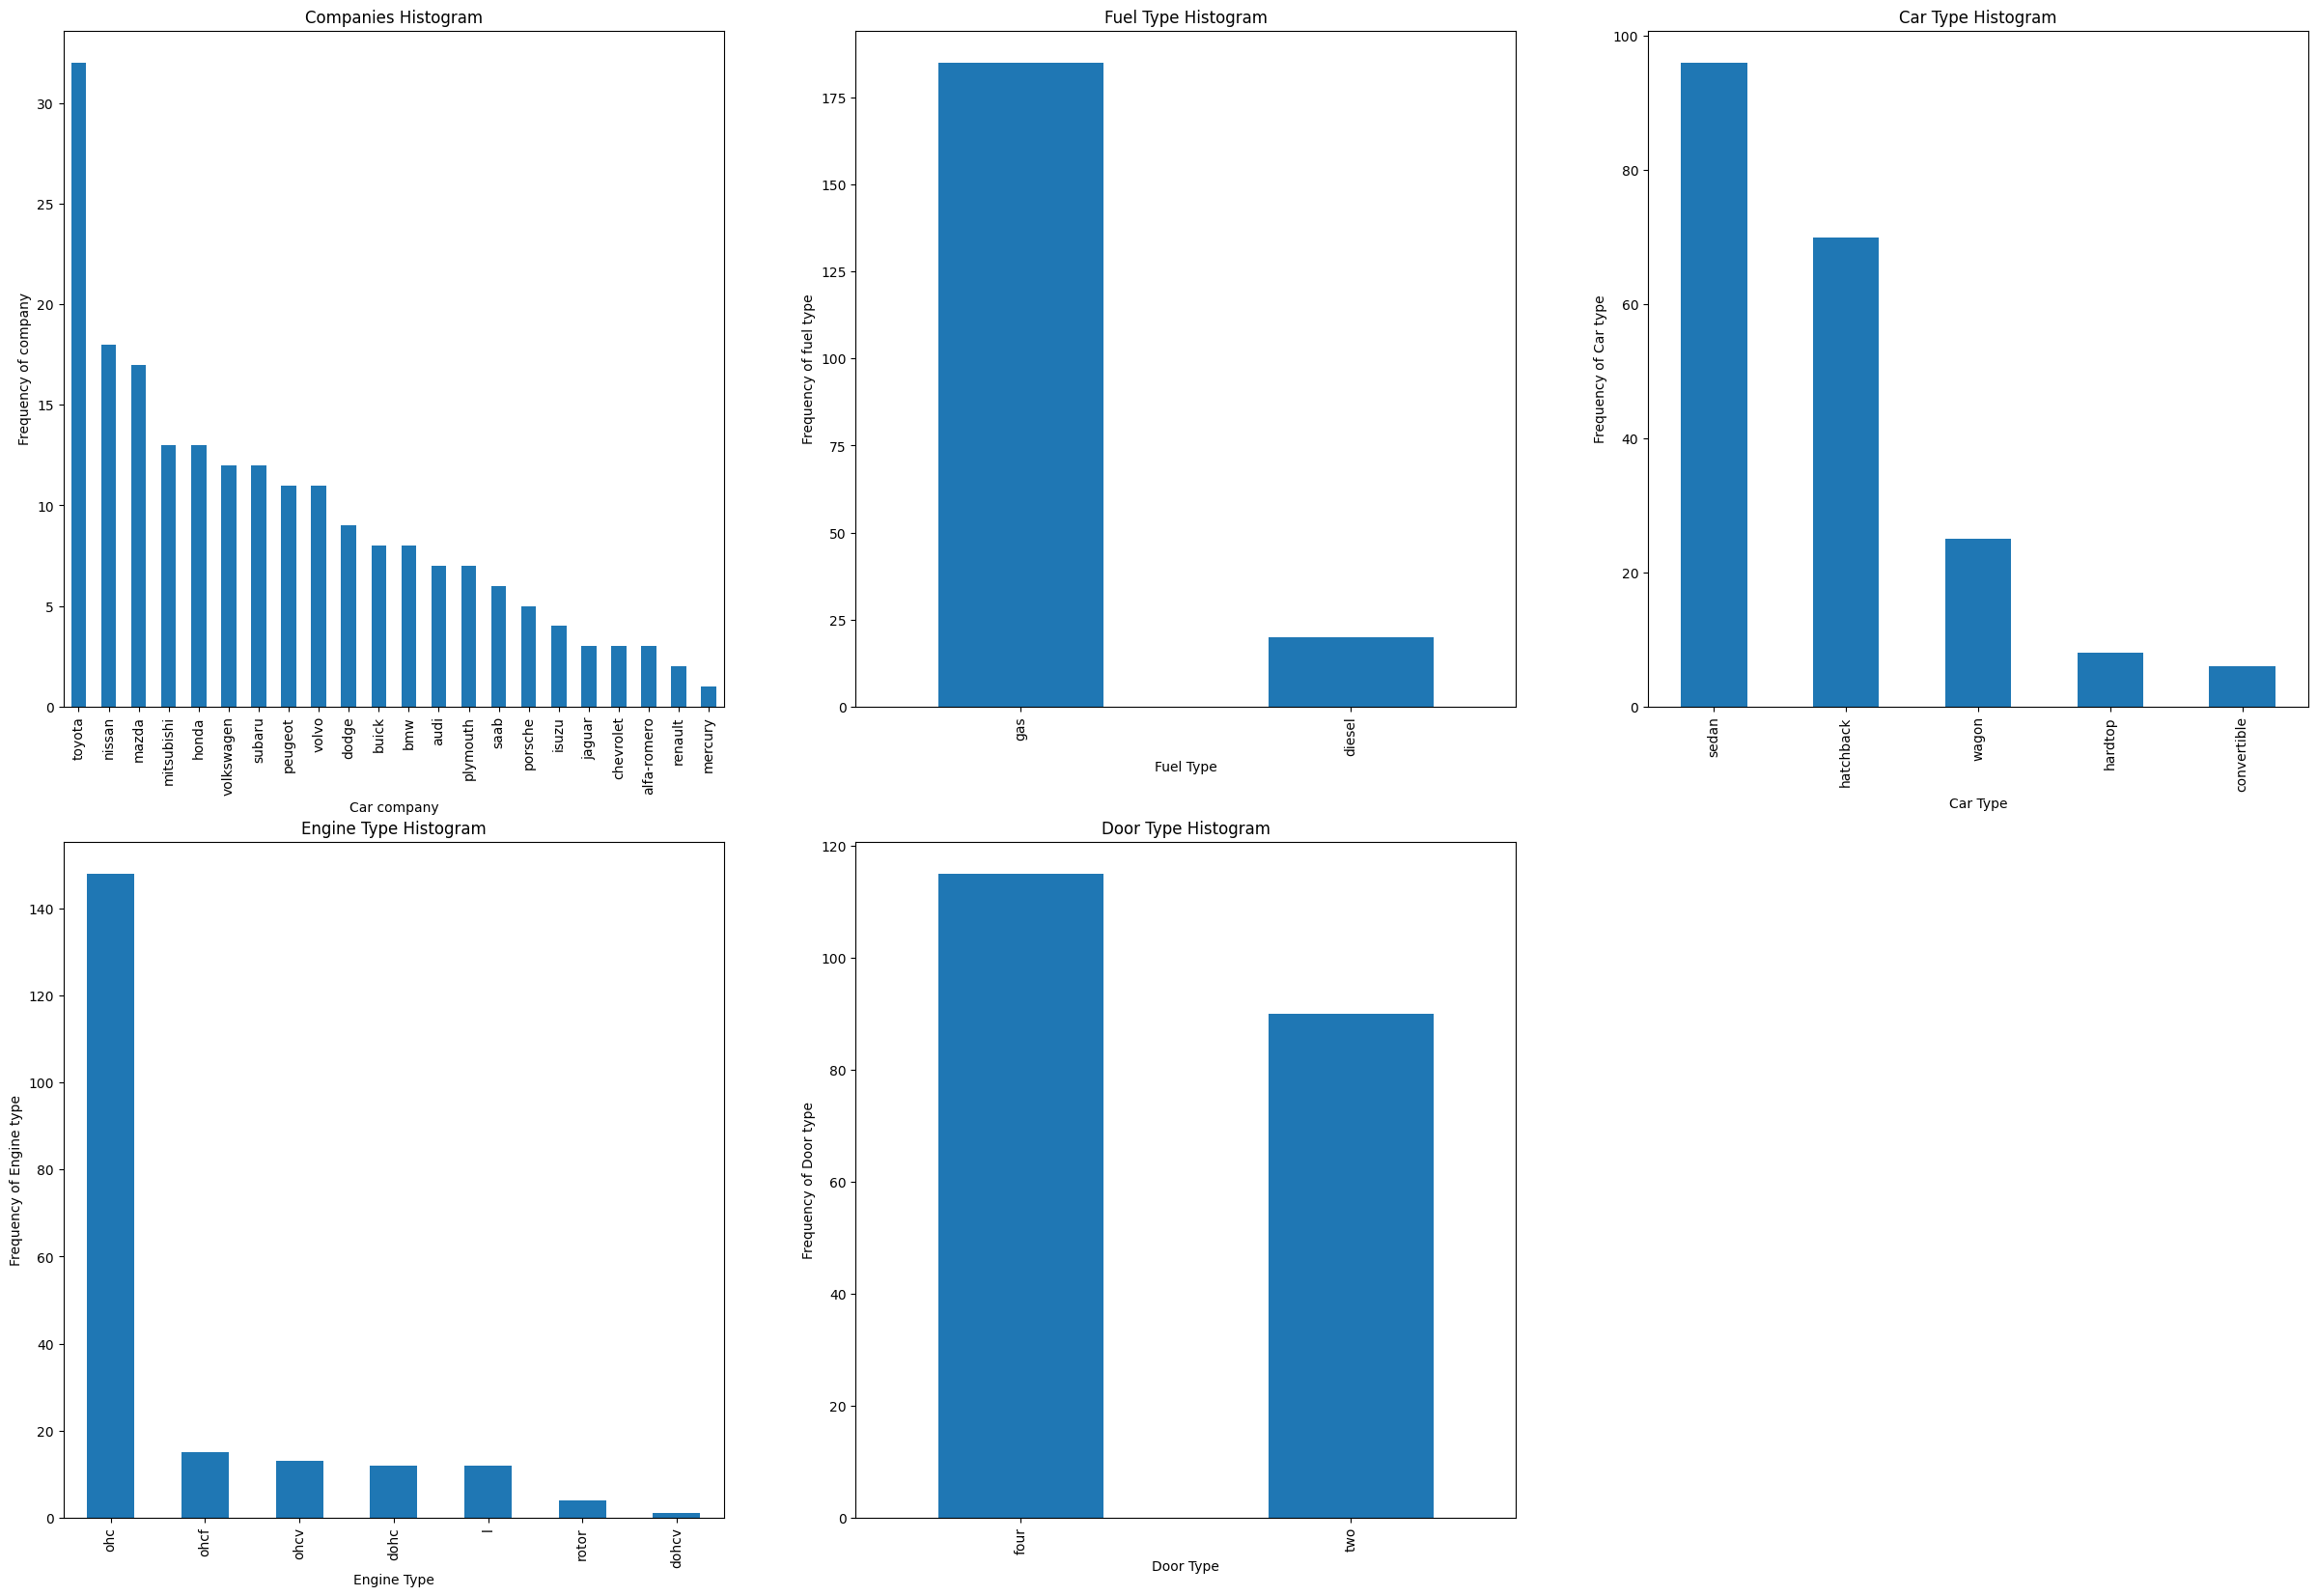

In [ ]:
plt.figure(figsize=(30, 20))

# Plot - shows how many cars each company has produced in the data
plt.subplot(2,3,1)
plt1 = cars.CompanyName.value_counts().plot(kind='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

# Plot - shows the type of fuels and the no.of cars that use them in the data
plt.subplot(2,3,2)
plt1 = cars.fueltype.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

# Plot - shows the different types of cars and their count in the data
plt.subplot(2,3,3)
plt1 = cars.carbody.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

#Plot - shows the different types of engines and their count in the data
plt.subplot(2,3,4)
plt1 = cars.enginetype.value_counts().plot(kind='bar')
plt.title('Engine Type Histogram')
plt1.set(xlabel = 'Engine Type', ylabel='Frequency of Engine type')

#Plot - shows the different types of doorcount and their count in the data
plt.subplot(2,3,5)
plt1 = cars.doornumber.value_counts().plot(kind='bar')
plt.title('Door Type Histogram')
plt1.set(xlabel = 'Door Type', ylabel='Frequency of Door type')

plt.show()

In [ ]:
# Inference
# Toyota seemed to favoured car company
# There are more Gas fueled cars than Diesel fueled cars
# Sedan is the top car type prefered
# ohc engine type is highly prefered
# 4-door cars are prefered than 2-door cars

In [ ]:
# Now we'll figure out which features affect the car price the most
# We'll do this by plotting feature vs avg-price

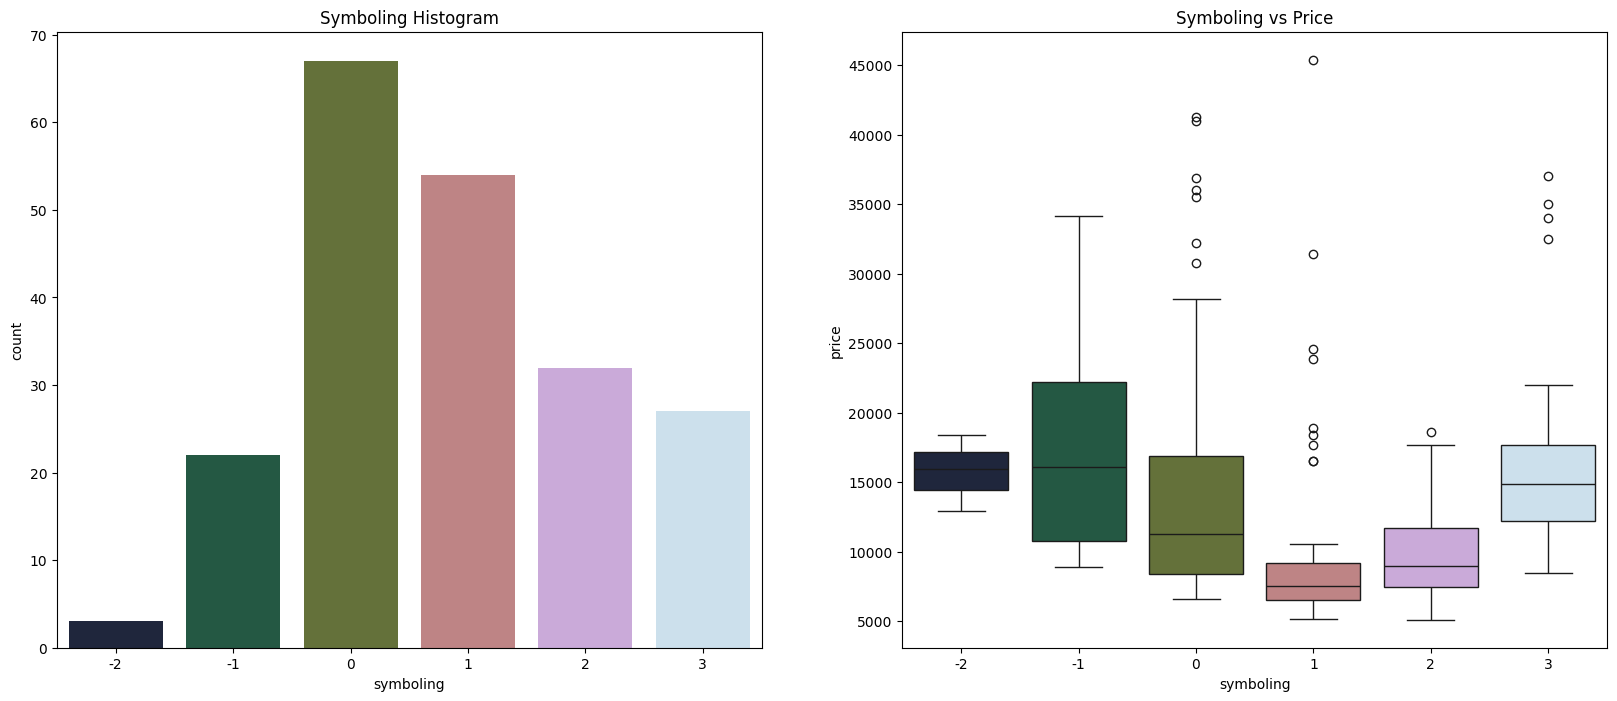

In [ ]:
# feature 1
# Symboling

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(x=cars.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=cars.symboling, y=cars.price, palette=("cubehelix"))

plt.show()

In [ ]:
# Inference
# Symbol 0 & 1 cars are most sold, price (around $12,500 & $9,000 respectively)
# The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.

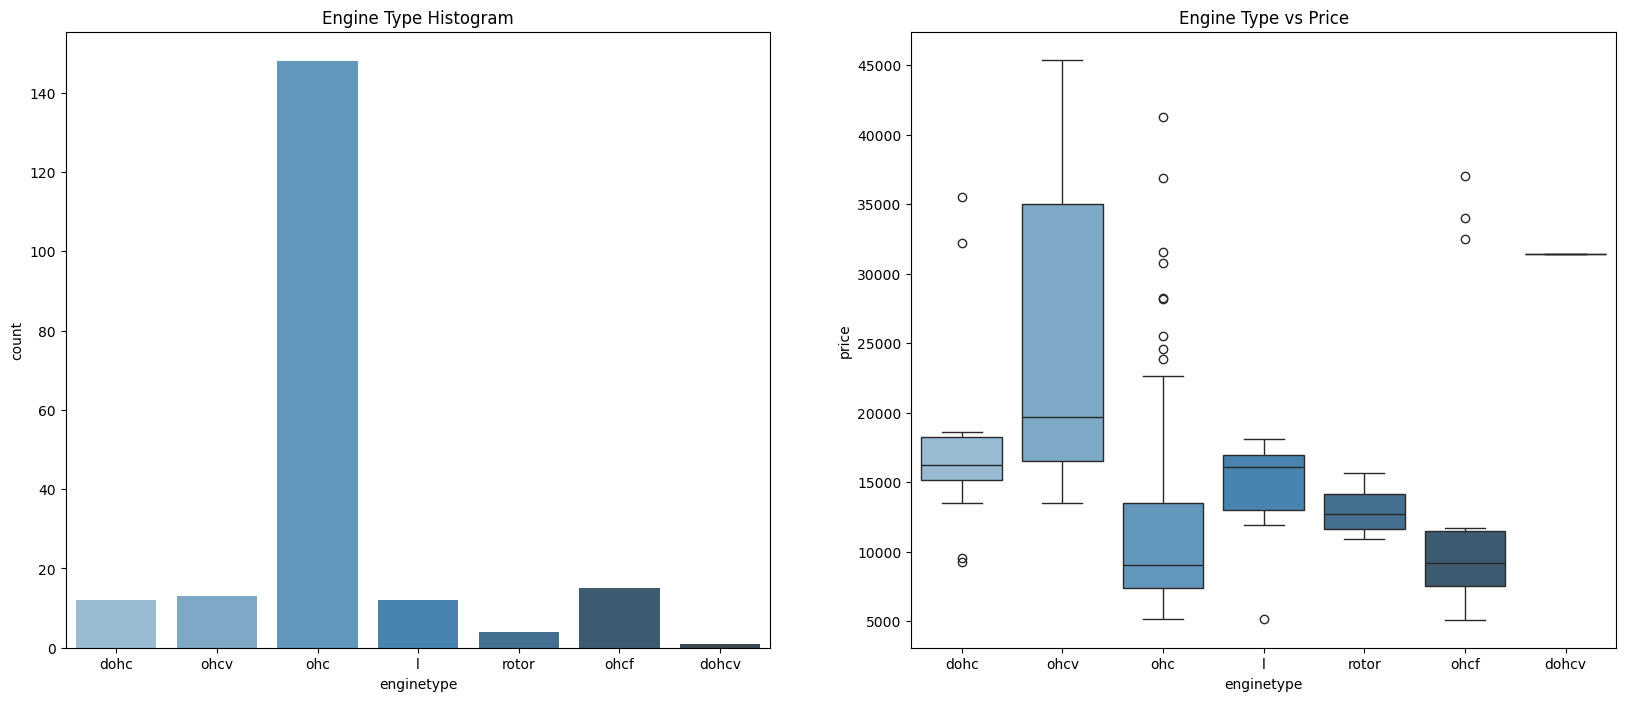

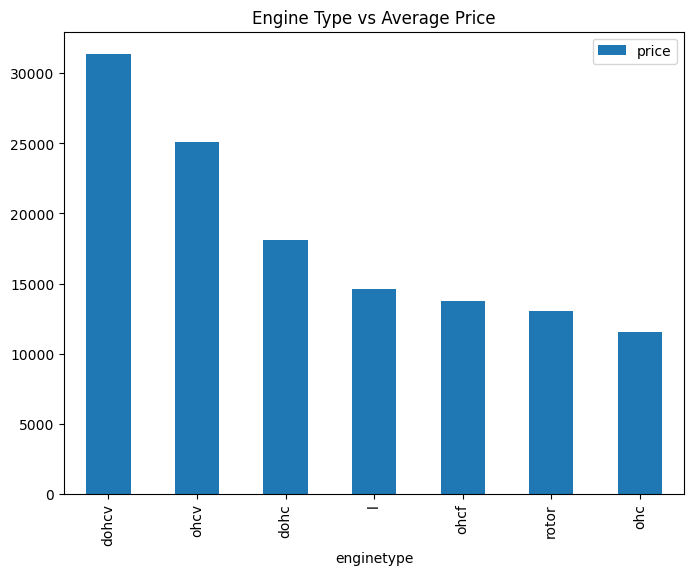

In [ ]:
# feature 2
# engine type

plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(x=cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("Blues_d"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

In [ ]:
# inference
# ohcv has the highest price range

<Figure size 2000x600 with 0 Axes>

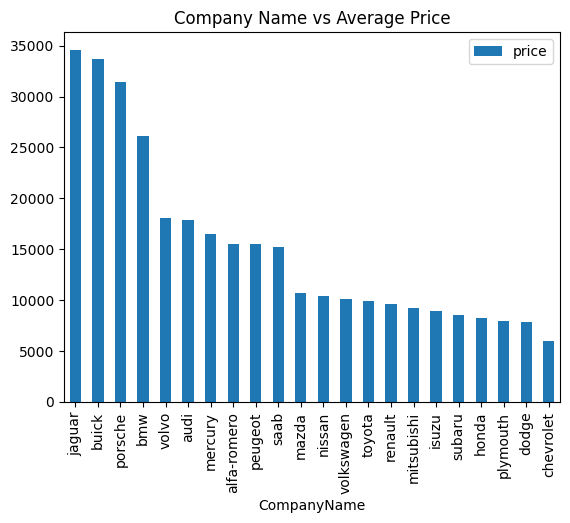

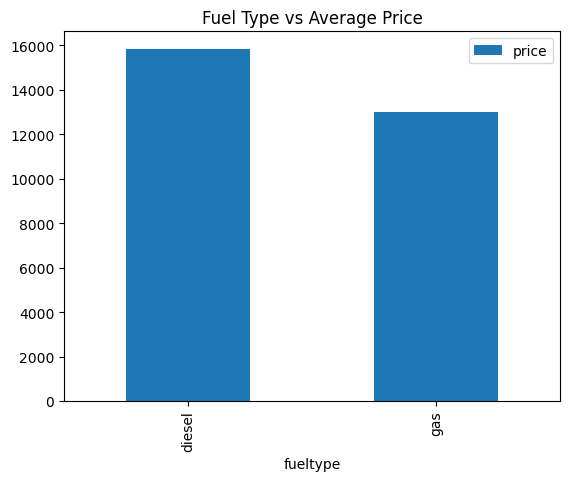

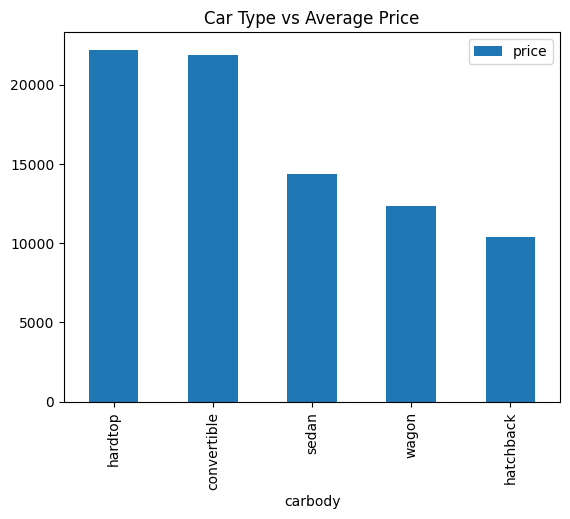

In [ ]:
# feature 3
# Company Name

plt.figure(figsize=(20, 6))

df = pd.DataFrame(cars.groupby(['CompanyName'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

# feature 4
# Fuel Type

df = pd.DataFrame(cars.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

# feature 5
# Car type

df = pd.DataFrame(cars.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

In [ ]:
# Inference
# Jaguar and Buick seem to have highest average price.
# diesel has higher average price than gas.
# hardtop and convertible have higher average price.

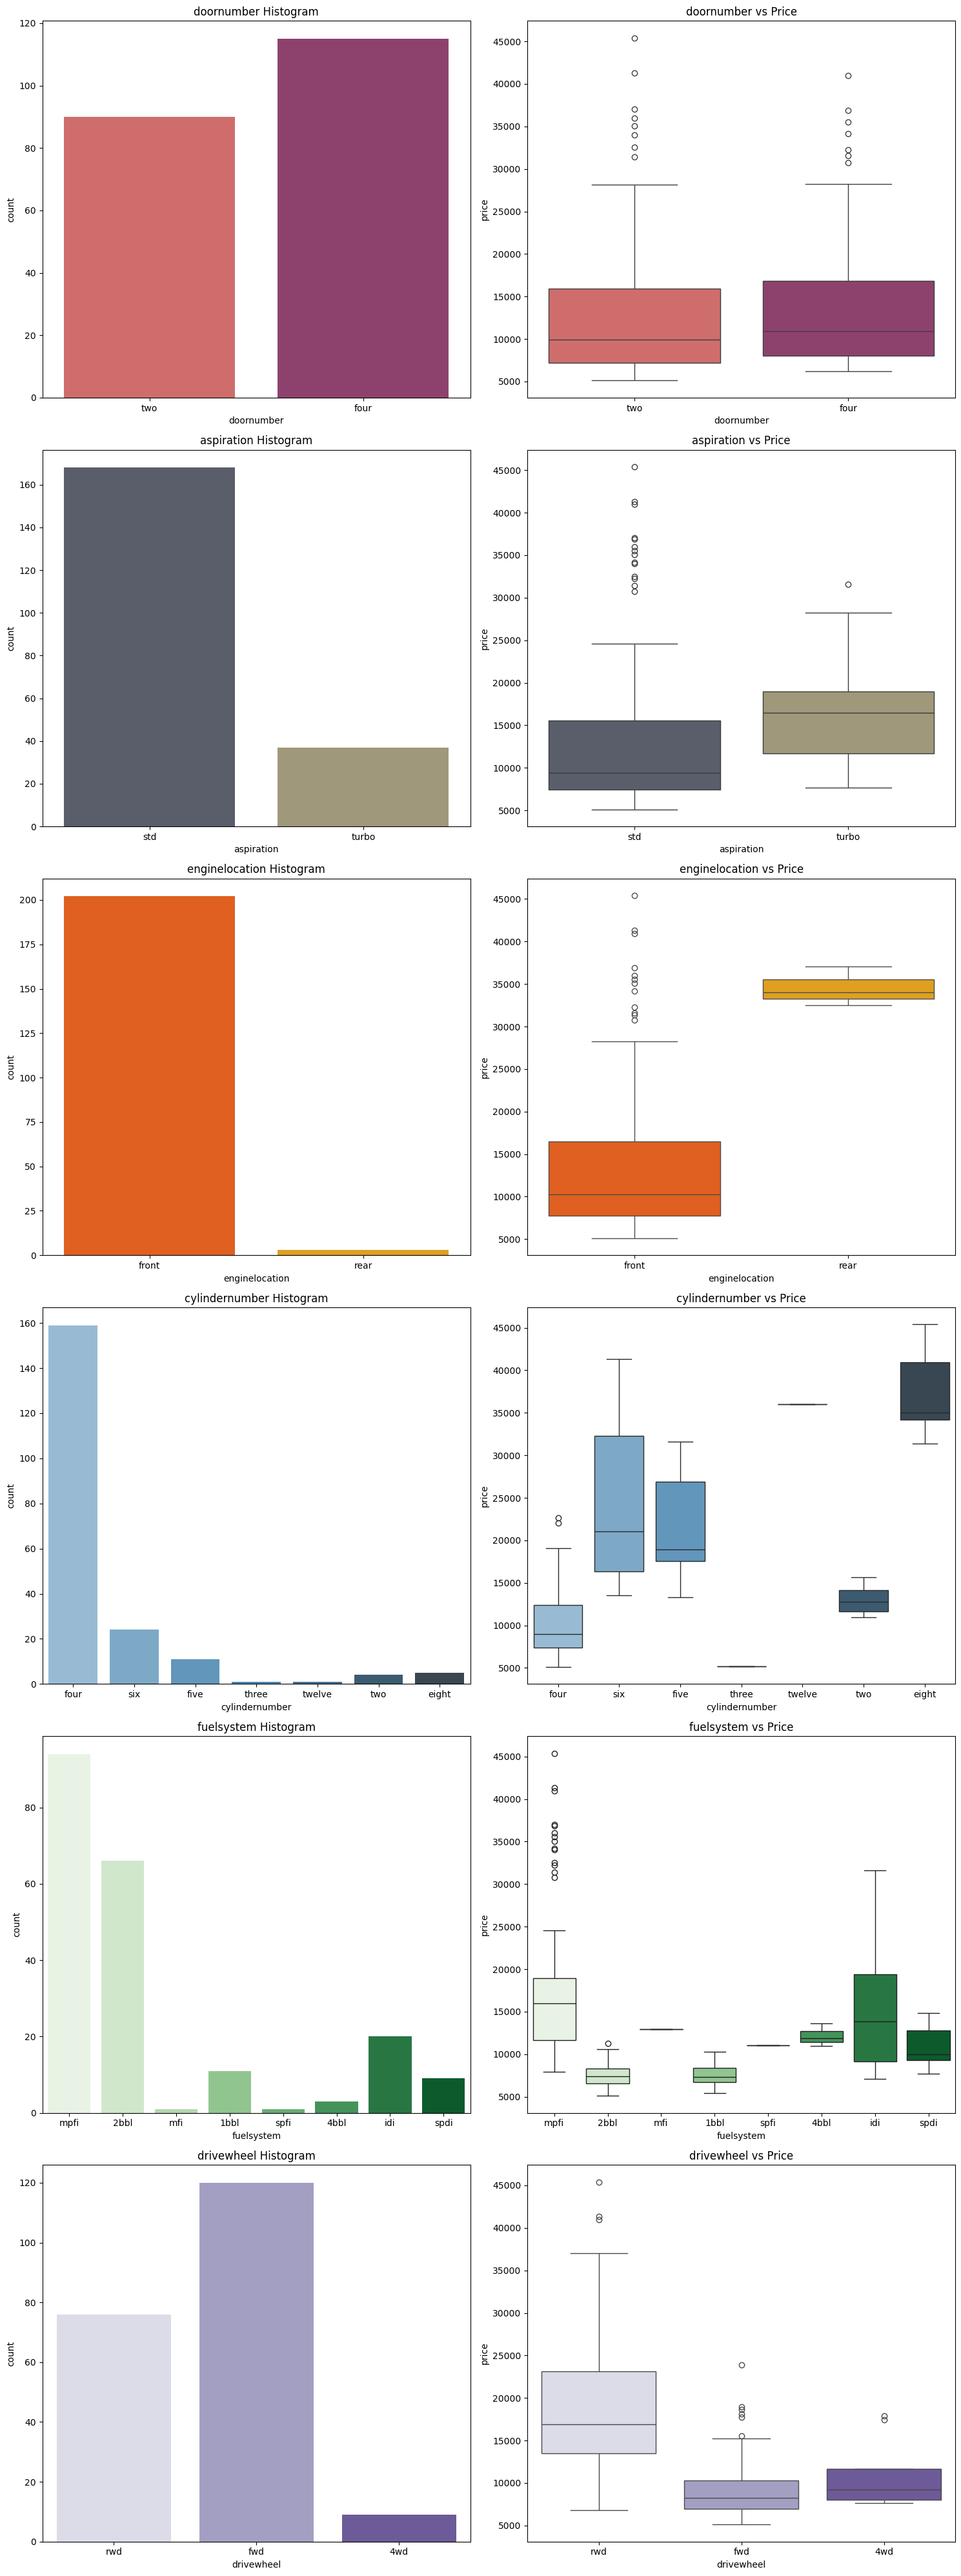

In [ ]:
# creating a helping function to generate count plots & box plots for the rest of the features
# DRY - Don't Repeat Yourself

def plot_count_and_box(x, ftNumber, plte):
    plt.subplot(6,2,ftNumber)
    plt.title(x+' Histogram')
    sns.countplot(x=cars[x],palette=(plte))
    plt.subplot(6,2,(ftNumber+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=(plte))

plt.figure(figsize=(15, 40))

plot_count_and_box('doornumber', 1, "flare")
plot_count_and_box('aspiration', 3, "cividis")
plot_count_and_box('enginelocation', 5, "autumn")
plot_count_and_box('cylindernumber', 7, "Blues_d")
plot_count_and_box('fuelsystem', 9, "Greens")
plot_count_and_box('drivewheel', 11, "Purples")

plt.tight_layout()

In [ ]:
# Inference

# difference in door numbers doesn't make a big difference in car price
# Turbo has higher price range than std
# engine location rear engines have an higher price range (NOTE : has very few data points, so inference is difficult)
# most common cyclindertypes are 8, 6, and 5. The 8 cyclinder type has the highest price range.
# mpfi and 2bbl are most common fuel systems. mfpi and idi has highest price range. But other are also pretty close(NOTE: due to few data points inference is difficult)
# signnificant difference in drivewheel category. most high ranged cars seems to prefer rwd drivewheel. fwd cars are the most preferred.

In [ ]:
# Visualising Numerical Data
# This is to find corelation between data and price. How these data affect the price.

In [ ]:
# Using Scatter Plot

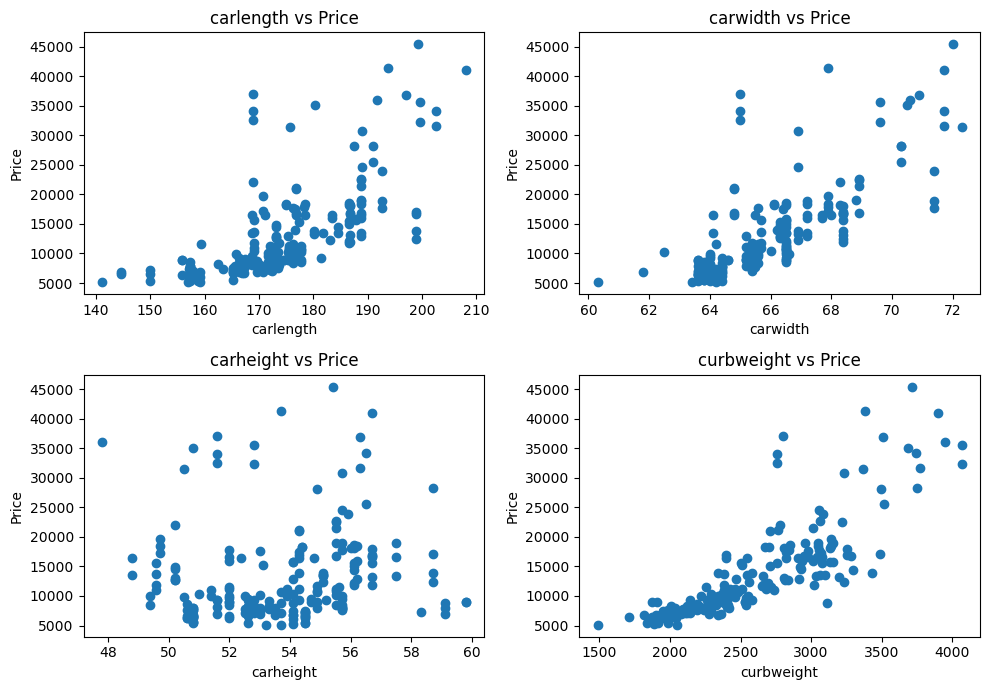

In [ ]:
def plot_scatter(x, ftNumber):
    plt.subplot(2,2,ftNumber)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10, 7))

plot_scatter('carlength', 1)
plot_scatter('carwidth', 2)
plot_scatter('carheight', 3)
plot_scatter('curbweight', 4)

plt.tight_layout()

In [ ]:
# Inference
# carwidth, carlength and curbweight seems to have a poitive correlation with price.
# carheight doesn't show any significant trend with price.

In [ ]:
# Using Pair Plot
# kind = 'scatter'

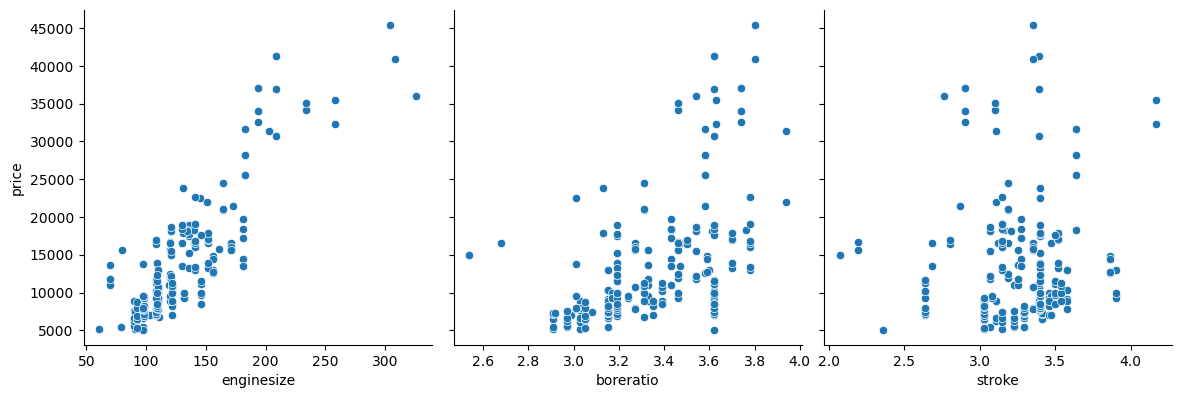

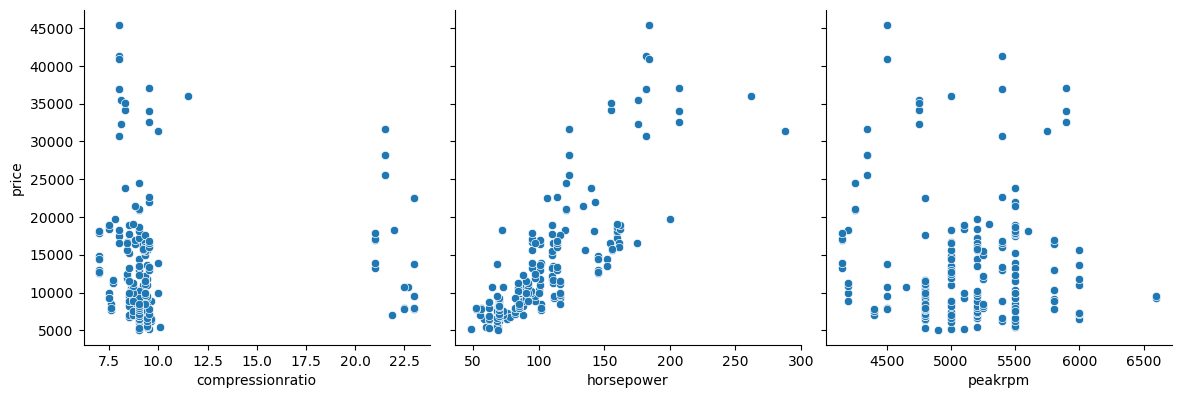

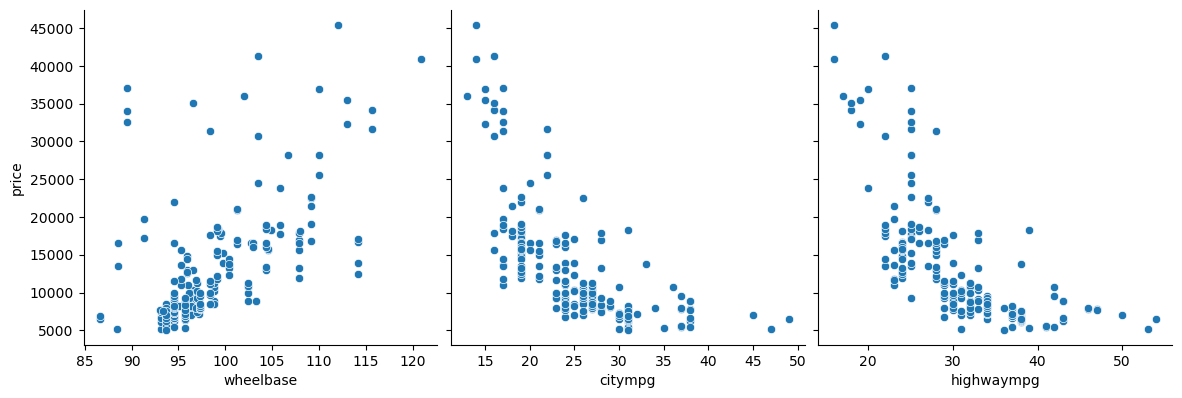

In [ ]:
def pair_plot(x,y,z):
    sns.pairplot(cars, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pair_plot('enginesize', 'boreratio', 'stroke')
pair_plot('compressionratio', 'horsepower', 'peakrpm')
pair_plot('wheelbase', 'citympg', 'highwaympg')

In [ ]:
# Inference
# enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price. -. As thse values increase the price of the car also increases.
# citympg, highwaympg - seem to have a significant negative correlation with price. --> As these values increase the price of the car decreases.

In [ ]:
# With the above inferecnes, we'll derive new features.

In [ ]:
# DERIVING NEW FEATURES

In [ ]:
# New feature - Fuel Economy
# As we saw CityMP and Highway MPG has a negative impact on the price of the car.
# These are nothing but mileage.
# CityMPG - City miles per gallon, HoghwayMPG - Highway miles per gallon
# How much miles it can travel with 1 gallon of fuel in a city / highway.
# So we can say that expensive cars have low MPG.
# So we'll generate a new measure(fuel economy) by a simple formula
# FuelEconoly = (0.55*CityMPG) + (0.45*HighwayMPG)